In [18]:
import numpy as np
import codecs
import pickle
from collections import Counter
import json
from __future__ import division

In [19]:
from collections import Counter
from matplotlib import pyplot as plt
import re
import itertools


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, IncrementalPCA

In [22]:
def read_text_file(i_file, encoding='utf-8'):
    lines = []
    with codecs.open( i_file, "r", "utf-8" ) as f:
        lines = f.read().splitlines()
    return lines

In [23]:
import glob
import os

In [24]:
import pandas as pd

### 1. Load data

#### The Yale Face Database B is available at http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html<br> Download the cropped version and extract to a folder such as Your_YaleB_Path

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
IMG_PATH = "/content/drive/My Drive/Colab Notebooks/Nordic Coder/Machine Learning/Assignment 7 - Model Selection (PCA)" + "/CroppedYale"
#IMG_PATH = os.path.join("/apps4/maonx/" + '/CroppedYale')

In [27]:
img = Image.open(os.path.join(IMG_PATH, 'yaleB07/yaleB07_P00A-010E-20.pgm') )

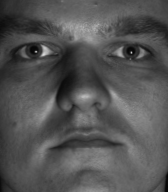

In [28]:
img

In [29]:
print("Image Shape: %d x %d" %(img.height, img.width))

Image Shape: 192 x 168


In [13]:
### Remove bad image from list

In [30]:
bad_images = read_text_file(os.path.join(IMG_PATH, "bad.txt"))

In [31]:
bad_images = map(lambda x: x.split(' ')[0], bad_images)

In [32]:
bad_images

#### Generate the lables Y

In [38]:
Y = []
subjects = glob.glob(os.path.join(IMG_PATH, "*/"))
img_paths = []
def check_bad_img(x, bad_images):
    for e in bad_images:
        if x.find(e) >-1:
            return True
    return False
for i in range(len(subjects)):
    l_fn = glob.glob(subjects[i]+'*.pgm')
    l_fn = filter(lambda x: not check_bad_img(x, bad_images), l_fn)
    img_paths += l_fn
    print(len(l_fn))
    Y += [i]*len(l_fn)
Y = np.array(Y)

TypeError: ignored

In [34]:
print("Number of images: %d. Number of subjects: %d" %(len(img_paths), len(subjects)))
print("Labels of the first 10 images:", Y[0:10]) # labels of the first 10 images
print("labels of the last 10 images", Y[-10:]) # labels of the last 10 images

Number of images: 65. Number of subjects: 38
Labels of the first 10 images: []
labels of the last 10 images []


#### Convert the data from images to numpy matrix

In [ ]:
dims = (192, 168)

In [ ]:
X = np.zeros((len(img_paths),dims[0]*dims[1]))
for i in range(len(img_paths)):
    image  = Image.open(img_paths[i])
    if not (image.height, image.width) == dims:
        image = image.resize(dims)
    X[i,:] = image.getdata()
    
print("X shape: " + str(X.shape))

### 2. Feature Extraction
##### In this tutorial, we just apply PCA for the feature engineering task. In practice, some image processing and augmentation techniques would be used to enhance the the performance

In [ ]:
pca_model = PCA(copy=False, n_components=100) 

#### # We project the data to 100 dimensions associated with 100 eigenvectors corresponding to 100 greatest eigenvalues of the covariance matrix

In [ ]:
np.mean(X, axis=0).shape

In [ ]:
?? np.linalg.svd

In [ ]:
?? np.linalg.eig

In [ ]:
X_dash = X-np.mean(X,axis=0)
covM = np.matmul(X_dash.T, X_dash)
S, U = np.linalg.eig(covM)

In [ ]:
X_dash.shape

In [ ]:
def MyPCA(X):
    meanX = np.mean(X, axis=0)
    U, S, V = np.linalg.svd(X-meanX,full_matrices=False)
    return U, S, V, meanX
def MyPCA_Transform(X, V, n_components, mean=None):
    if X.shape[1] != V.shape[1]:
        X = X.T
    assert n_components <= len(U)
    if mean is None:
        X = X - mean
    return np.matmul(X, V[0:n_components,:].T )

In [ ]:
pca_model.components_

In [ ]:
V

In [ ]:
X_prj[0:10,:]

In [ ]:
U, S, V, meanX = MyPCA(X)

In [ ]:
for i in range(len(S)):
    if S[i] < 1e-6:
        print(i, S[i])

In [ ]:
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if np.linalg.norm(X[i]-X[j])<1e-6:
            print(i, j)

In [ ]:
np.linalg.norm(np.matmul(np.matmul(U, np.diag(S)), V) - (X-np.mean(X, axis=0)))

In [ ]:
test_proj = MyPCA_Transform(X[0:10,:], V, 100, meanX)

In [ ]:
test_proj

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
cdist(X_prj, X_prj[0:10,:])

In [ ]:
centroids = X_prj[0:10,:]

In [ ]:
cdist(X_prj, centroids)

In [ ]:
np.repeat(X[0:10,:], 5, axis=0).shape

In [ ]:
from scipy.spatial.distance import euclidean

In [ ]:
?? cdist

In [ ]:
cdist(X_prj, centroids)

In [ ]:
def mycdist(X, Y):
    '''sX = np.zeros((X.shape[0], 1))
    sY = np.zeros((Y.shape[0], 1))
    for i in range(len(X)):
        sX[i] = np.matmul(X[i,:].T, X[i,:])
    for i in range(len(Y)):
        sY[i] = np.matmul(Y[i,:].T, Y[i,:])'''
    sX = np.square(np.linalg.norm(X, axis=1)).reshape(-1,1)
    sY = np.square(np.linalg.norm(Y, axis=1)).reshape(-1,1)
    #print(np.repeat(sX, len(Y), axis=1).shape, np.repeat(sY.T, len(X), axis=0).shape)
    return np.sqrt(np.repeat(sX, len(Y), axis=1) + np.repeat(sY.T, len(X), axis=0) - 2*np.matmul(X,Y.T))

In [ ]:
np.linalg.norm(X,axis=1).shape

In [ ]:
np.linalg.norm(X).shape

In [ ]:
mycdist(X_prj, centroids)

In [ ]:
cosine_similarity(test_proj[0:10,:], X_prj[0:10,:]).shape

In [ ]:
np.sum(np.square(test_proj+   X_prj[0:10,:]))

In [ ]:
#X_prj = pca_model.fit_transform(X)
pca_model.fit(X)
X_prj = pca_model.transform(X)

In [ ]:
print("Projected X shape: " + str(X_prj.shape))

In [ ]:
print("100 eigenvectors of the covariance matrix: \n"+ str(pca_model.components_) )

#### Basically, the PCA model transform the data by taking the zero-mean at first, and then projecting them on the above eigenvectors. We can check that as the following code

In [ ]:
test_proj = np.matmul((X[0:10,:] - np.mean(X, axis=0)), pca_model.components_.T)
print("The L2 distance: %.5f" % np.sum(np.square(test_proj-X_prj[0:10,:])))
print("test_proj", test_proj)
print("X_prj[0:10,:]", X_prj[0:10,:])

## 3. Model Selection

### Train-Test splitting.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_prj, Y, test_size=0.33, random_state=0)

### Logistic Regression

In [ ]:
clf =LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

### Support Vector Machine with Linear Kernel

In [ ]:
clf =SVC(kernel='linear', C=1.0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

#### You can change the kernel to 'rbf' and see what happens

### Two hidden layers Neural Networks

#### Feel free to change the number units of hidden layers and observe how it will affect the performance. <br>Tips: Increase the number of parameters when the model under-fits the data and decrease the number of params when the model over-fits the data

In [ ]:
clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(850, 50), random_state=0, max_iter=200) # thay 500, 600, 700 rồi dừng
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

### A short introduction to Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
# Parameters
learning_rate = 0.1
num_steps = 300
batch_size = 128
display_step = 50

# Network Parameters
n_hidden_1 = 850 # 1st layer number of neurons
n_hidden_2 = 50 # 2nd layer number of neurons
num_input =  100 # MNIST data input (img shape: 28*28)
num_classes = len(subjects) # MNIST total classes (0-9 digits)


In [ ]:
tf.reset_default_graph()
#del graph
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)

with graph.as_default():
    # Define the computation graph (your neural networks)
    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }
    # tf Graph input
    Xp = tf.placeholder(name = "input", shape=[None, num_input], dtype = tf.float32)
    Yp = tf.placeholder(name='labels', shape=None, dtype=tf.int64)
    is_training = tf.placeholder(name='is_training', dtype=tf.bool)
    keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

    fc1 = tf.add(tf.matmul(Xp, weights['h1']), biases['b1']) #w1*x+b1
    #fc1 = tf.contrib.layers.batch_norm(fc1, is_training=is_training)
    #fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, keep_prob)
    # Hidden fully connected layer with 256 neurons
    fc2 = tf.add(tf.matmul(fc1, weights['h2']), biases['b2']) #w2*fc1 + b2
    fc2 = tf.contrib.layers.batch_norm(fc2, is_training=is_training)
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # Output fully connected layer with a neuron for each class
    logits = tf.matmul(fc2, weights['out']) + biases['out']# w3*fc2+b3
    logits = tf.nn.dropout(logits, keep_prob)
    
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=Yp))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        train_op = optimizer.minimize(loss_op)
    #train_op = optimizer.minimize(loss_op)

    # Evaluate model (with test logits, for dropout to be disabled)
    pred = tf.argmax(logits, 1)
    correct_pred = tf.equal(tf.argmax(logits, 1), Yp)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

#### You could uncomment some lines in the above code for fine-tunning the model. I had used BatchNorm and Dropout layers to make the model more stable. The theory of these techniques can be found at: <br>
https://arxiv.org/abs/1502.03167 Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
http://jmlr.org/papers/v15/srivastava14a.html Dropout: A Simple Way to Prevent Neural Networks from Overfitting 

In [ ]:
# ??  tf.nn.sparse_softmax_cross_entropy_with_logits

In [ ]:
with graph.as_default():
    sess.run(init)
    for step in range(num_steps):
        batch_begin = 0
        while batch_begin + batch_size<= len(X_train):
            batch_x = X_train[batch_begin:batch_begin+batch_size]
            batch_y = Y_train[batch_begin:batch_begin+batch_size]
            sess.run(train_op, feed_dict={Xp: batch_x, Yp: batch_y.astype(np.int64), keep_prob: 0.5, is_training:True})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={Xp: batch_x,
                                                                     Yp: batch_y.astype(np.int64),
                                                                     keep_prob: 1.0, is_training:False})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))
        
            batch_begin+=batch_size
print("Optimization Finished!")

In [ ]:
with graph.as_default():
    Y_pred, acc = sess.run([pred, accuracy], feed_dict={Xp: X_test,
                                                                     Yp: Y_test.astype(np.int64),
                                                                     keep_prob: 1.0, is_training:False})
    print("Accuracy test set : " + \
                      "{:.3f}".format(acc))

### Exercise:
#### Split the data to 3 different sets: train, dev and test. Use the train-set for training, dev-set for tunning, and finally evaluate the model performance on test-set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1612)   
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X val', X_val.shape)
print('Shape of y val', y_val.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

In [ ]:
def cnn(input_shape):
  model = Sequential() 
  model.add(Flatten(input_shape=X_train.shape[1:])) 
  model.add(Dense(512, activation='relu', name='hidden_layer_1'))
  model.add(Dropout(0.3)) # Dropout nằm giữa Dense và Activation, chứ ko phải sau Flatten Input
  model.add(Dense(4, activation='softmax', name='output_layer'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
  return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
tuned_model = cnn(X_train.shape[1:])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
tuned_history = tuned_model.fit(X_train, Y_train, epochs=1000, validation_data=(X_val, Y_val), batch_size=512, shuffle=True, callbacks=[early_stop]) # để sau cùng: truyền vào array

In [ ]:
tuned_model.evaluate(X_train, Y_train)
tuned_model.evaluate(X_val, Y_val)
tuned_model.evaluate(X_test, Y_test)

In [ ]:
def draw_chart(history):
  plt.figure(figsize=(15,8))
  
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

In [ ]:
draw_chart(tuned_history)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_pred = tuned_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm_cnn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm_cnn, annot=True, 
            cmap='Blues', fmt='.1f')